In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/boston_data.csv')

In [3]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [5]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

### During EDA we have observed that the data contains outliers. We need to remove them before proceeding for modelling. 

In [6]:
def remove_outliers(old_dataframe): 
    
    df2 = old_dataframe.copy()

    # putting limits 
    Q1 = df2.quantile(0.25)
    Q3 = df2.quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    print('-----------------------')
    # removing outliers
    df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |
                (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(df2_out.shape)
    print('------------------------')
    
    return df2_out

In [7]:
df_wo_outliers = remove_outliers(data)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
target       7.975000
dtype: float64
-----------------------
(268, 14)
------------------------


In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

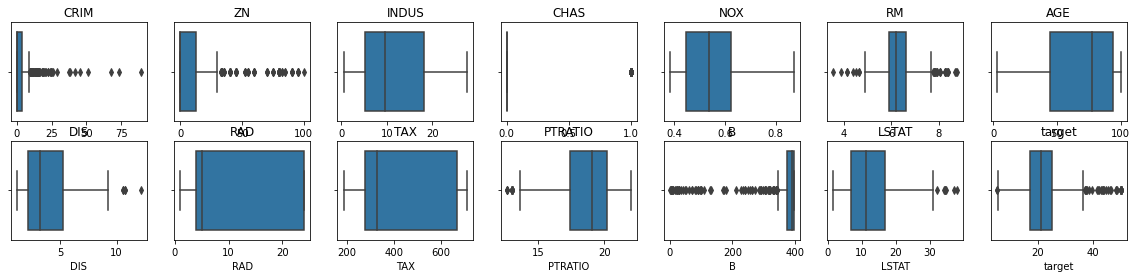

In [9]:
#plotting before removing outliers: 
fig, axes = plt.subplots(2,7, figsize=(20,4))

s1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], 
      [1,0], [1,1], [1,2], [1,3], [1,4], [1,5], [1,6]]

nf1 = data.columns

for i in range (len(nf1)):
    j = s1[i][0]
    k = s1[i][1]
    sns.boxplot(data[nf1[i]],  ax = axes[j,k])
    axes[j,k].set_title(nf1[i])
    
plt.show()    
    

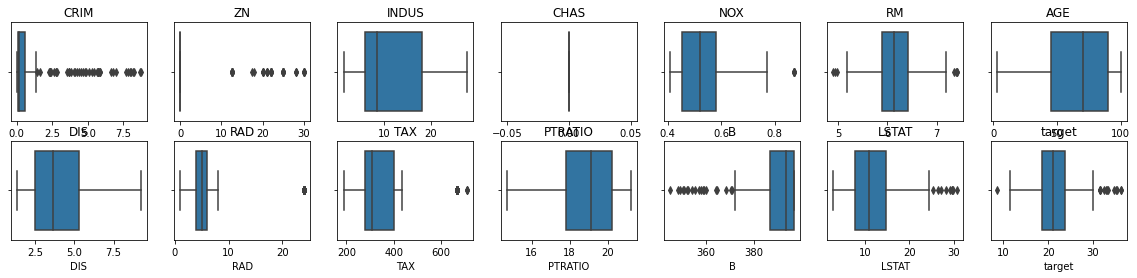

In [10]:
#plotting after removing outliers: 
fig, axes = plt.subplots(2,7, figsize=(20,4))

s1 = [[0,0], [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], 
      [1,0], [1,1], [1,2], [1,3], [1,4], [1,5], [1,6]]

nf2 = df_wo_outliers.columns

for i in range (len(nf2)):
    j = s1[i][0]
    k = s1[i][1]
    sns.boxplot(df_wo_outliers[nf2[i]],  ax = axes[j,k])
    axes[j,k].set_title(nf2[i])
    
plt.show()    
    
    

### Dependent and Independent Features:

In [11]:
df = data.copy()
#df = df_wo_outliers.copy()

### In EDA we have observed that 'TAX' and 'RAD' are highly correlated. Moreover, they have high VIF. So we decide to drop these features. 

In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [13]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']]

In [14]:

X.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [15]:
y = df.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [16]:
# numerical and categorical columns. In this data we do not have categorical data

num_columns = X.columns
num_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO',
       'B', 'LSTAT'],
      dtype='object')

#### So, we have read the input data. Splitted into dependent and independent variables. Now next is to perform data transformations, i.e. filling the null/missing values and then feature scaling. For this to do we will create a pipeline and then wrap up whole thing using ColumnTransformer.  

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
# pipeline 

num_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), 
        ('scaler', RobustScaler())
    ]
)


# preprocessor 

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns)
])


### Splitting into test and train sets

In [19]:
# Train test split 
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [21]:
X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train), 
                              columns=preprocessor.get_feature_names_out())
X_test_scaled = pd.DataFrame(preprocessor.transform(X_test), 
                              columns=preprocessor.get_feature_names_out())

### Model Building

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [24]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(), 
    'DecisionTree' : DecisionTreeRegressor(), 
    'RandomForest': RandomForestRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]
pred_list = list()

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_scaled)

    pred_list.append(y_pred)
    
    mae, mse, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("MSE", mse)
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
MSE 26.39146712426191
RMSE: 5.137262610015368
MAE: 3.3845521411078052
R2 score 0.6926054208351673


Lasso
Model Training Performance
MSE 30.035436612690248
RMSE: 5.480459525686714
MAE: 3.6404546456688696
R2 score 0.6501622909359899


Ridge
Model Training Performance
MSE 26.308953658822077
RMSE: 5.1292254443358285
MAE: 3.3672816969111437
R2 score 0.6935664963170602


Elasticnet
Model Training Performance
MSE 33.29562386451
RMSE: 5.770236031958311
MAE: 3.9303377577836613
R2 score 0.6121892641408866


DecisionTree
Model Training Performance
MSE 29.853521126760562
RMSE: 5.463837582392119
MAE: 3.7504225352112672
R2 score 0.6522811513228577


RandomForest
Model Training Performance
MSE 14.548113836619716
RMSE: 3.814198977061857
MAE: 2.5337859154929574
R2 score 0.8305508629211964




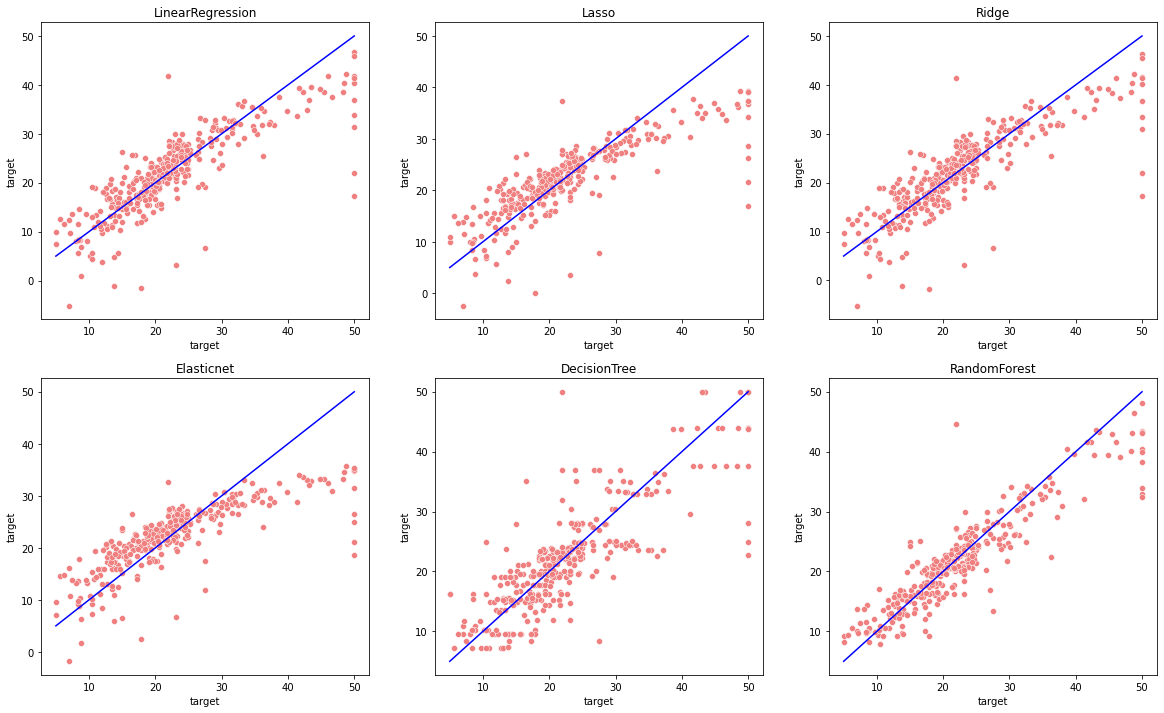

In [25]:
fig, axes = plt.subplots(2,3, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], 
      [1,0], [1,1], [1,2]]

for items in range(0, len(model_list)): 
    i = si[items][0]
    j = si[items][1]
    sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.scatterplot(y_test, pred_list[items], color = 'lightcoral', legend = True, ax=axes[i,j])
    axes[i,j].set_title(model_list[items])    
    #axes[i,j].set_xlabel('rom y test)')
    #axes[i,j].set_ylabel(f'FWI (from {lnames[items]})')
    #axes[i,j].legend(['y_test', lnames[items] ])
    
    
plt.show()

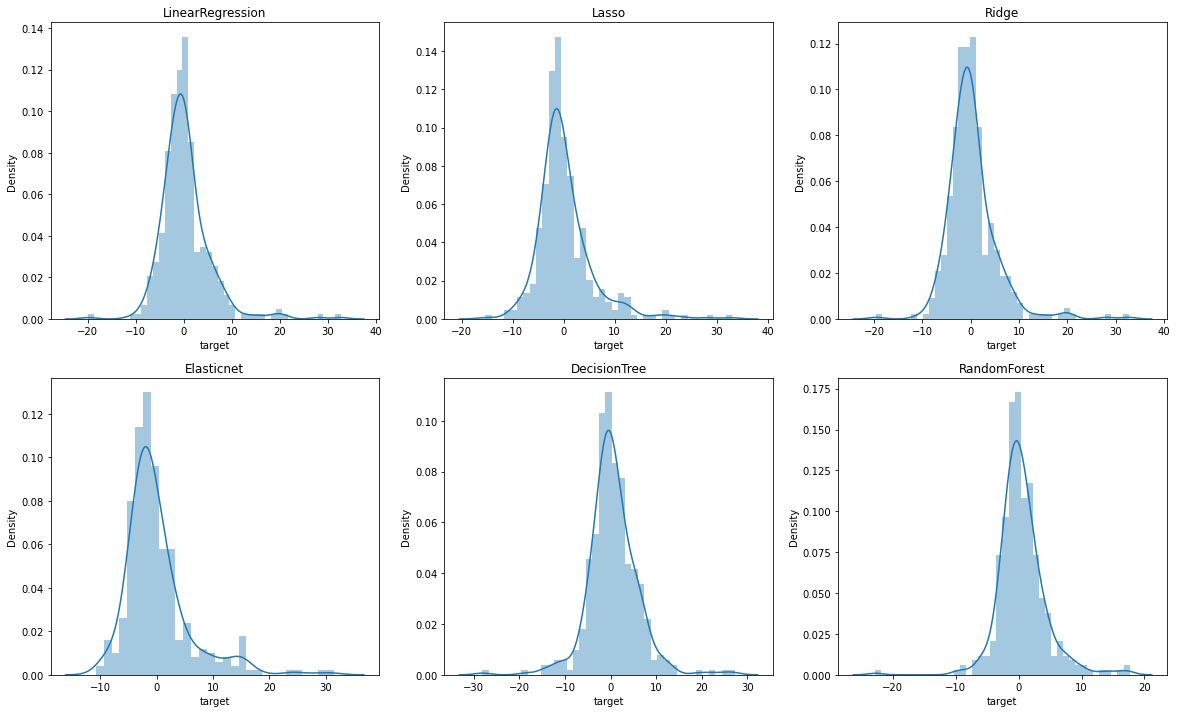

In [26]:
fig, axes = plt.subplots(2,3, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], 
      [1,0], [1,1], [1,2]]

for items in range(0, len(model_list)): 
    i = si[items][0]
    j = si[items][1]
    #sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.distplot(y_test - pred_list[items], ax=axes[i,j])
    axes[i,j].set_title(model_list[items])    
    
plt.show()

### Comments and Discussion : 


- Removing the features 'TAX' and 'RAD' have lowered the r2 scores of the models. But logically thinking, these features should be removed while building a model, as they are highly correlated with each other. This can also be seen that these two features have high VIF values. 

- Removing outliers and using RobustScalar has improved the result significantly.

- Random Forest generalizes the data more efficiently than other models. But if we need a model which is easy to interprete then we should go for Linear Regression model. The metrics are not very different in these two cases. 